In [2]:
import subprocess
import spot
from spot.jupyter import display_inline

from IPython.display import display
from specs import LDBA, Spec_Controller

spot.setup()

Concepts (FLAGS and Automaton) :
https://spot.lre.epita.fr/concepts.html

spot.formula("Fb & (Fb -> FXa)")

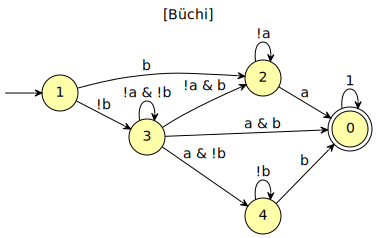

In [2]:
f = spot.formula("F(b) & ( (F b) -> (F(X a)) )")
display(f)
a = spot.translate(f, 'det', 'sbacc')
a

spot.formula("Fb & G!(a & b) & (Fb U Fa)")

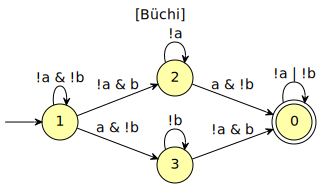

In [3]:
f = spot.formula("G!(a&b) & (F b) & ( (F b) U (F a) )")
display(f)
a = spot.translate(f)
a

spot.formula("Fb & G!(a & b) & G(b -> Fa)")

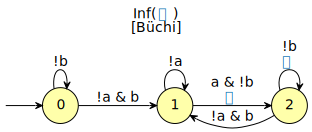

In [10]:
f = spot.formula("G!(a&b) & (F b) & G( (b) -> (F a) )")
display(f)
a = spot.translate(f, "Buchi")
a

In [70]:
rabinizer_dir = '/home/crarojasca/Monash/HRL_LTL_Goals/almanac/src/rabinizer4'
def get_aut(ltl):
    aut = subprocess.check_output(
        "bin/ltl2ldba \"{}\"".format(ltl), 
        cwd=rabinizer_dir, shell=True)
    a = spot.automaton(aut.decode('utf-8'))
    return a

ltl = "G!(a&b) & (F b) & G( (b) -> (F a) )"
a = get_aut(ltl)
a

 B => A

spot.formula("G!(a & b) & Fb & G(b -> Fa) & G(a -> X!alive)")

spot.formula("alive & G(!alive | !(a & b)) & F(alive & b) & G(!alive | (b -> F(a & alive))) & G(!alive | (a -> X!alive)) & (alive U G!alive)")

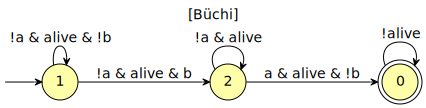

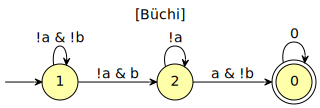

In [2]:
f = spot.formula("G!(a&b) & (F b) & G( (b) -> (F a) ) & G( a -> X !alive)")
display(f)
f = spot.from_ltlf("G!(a&b) & (F b) & G( (b) -> (F a) ) & G( a -> X !alive)")
display(f)
aut = f.translate('small', 'buchi', 'sbacc')
display(aut)
aut = spot.to_finite(aut)
aut

spot.formula("G(!(c0 & c1) & (c0 | c1)) & G(c0 -> X(c0 | c1)) & G(c1 -> Xc1)")

spot.formula("alive & G(!alive | (!(c0 & c1) & (c0 | c1))) & G(!alive | (c0 -> X(!alive | c0 | c1))) & G(!alive | (c1 -> X(!alive | c1))) & (alive U G!alive)")

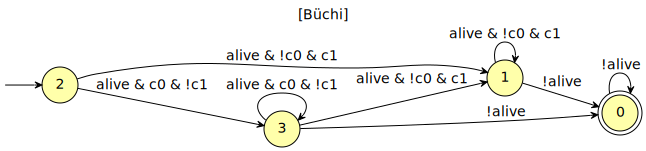

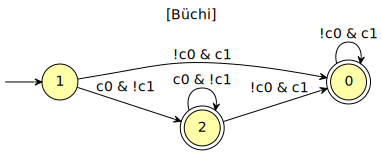

In [9]:
formula = "G(!(c0&c1) & (c0|c1)) & G(c0 -> X (c0|c1) ) & G(c1 -> X (c1))"
f = spot.formula(formula)
display(f)
f = spot.from_ltlf(formula)
display(f)
aut = f.translate('small', 'buchi', 'sbacc')
display(aut)
aut = spot.to_finite(aut)
aut

spot.formula("Fc0 & G((c0 -> Xc2) -> Xc3)")

spot.formula("alive & F(alive & c0) & G(!alive | ((c0 -> X(!alive | c2)) -> X(!alive | c3))) & (alive U G!alive)")

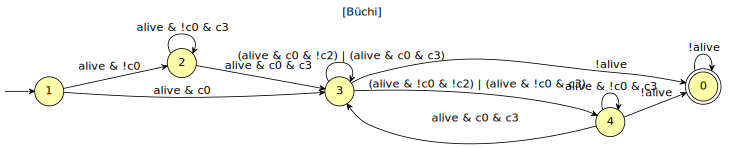

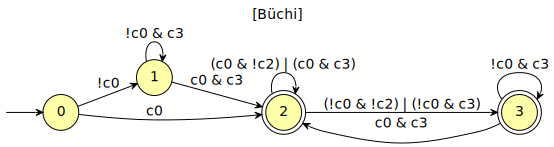

In [12]:
formula = "F(c0) & G((c0 -> X (c2)) -> X (c3)) "
f = spot.formula(formula)
display(f)
f = spot.from_ltlf(formula)
display(f)
aut = f.translate('small', 'buchi', 'sbacc')
display(aut)
aut = spot.to_finite(aut)
aut

In [98]:
bdict = aut.get_dict()
init = aut.get_init_state_number()
ui = aut.is_univ_dest(init)
print("Initial states: {}{}{}".format("{ " if ui else "",
                                      " ".join(map(str, aut.univ_dests(init))),
                                      " }" if ui else ""))
for s in range(0, aut.num_states()):
    print("State {}:".format(s))
    for t in aut.out(s):
        ud = aut.is_univ_dest(t)
        print("  edge({} -> {}{}{})".format(t.src,
                                            "{ " if ud else "",
                                            " ".join(map(str, aut.univ_dests(t))),
                                            " }" if ud else ""))
        print("    label =", spot.bdd_format_formula(bdict, t.cond))
        print("    acc sets =", t.acc)

Initial states: 1
State 0:
  edge(0 -> 0)
    label = 0
    acc sets = {0}
State 1:
  edge(1 -> 1)
    label = !a & !b
    acc sets = {}
  edge(1 -> 2)
    label = !a & b
    acc sets = {}
State 2:
  edge(2 -> 0)
    label = a & !b
    acc sets = {}
  edge(2 -> 2)
    label = !a
    acc sets = {}


spot.formula("alive & (alive U G!alive) & G(!alive | !(a & b)) & G(!alive | (a -> X(!alive | b)))")

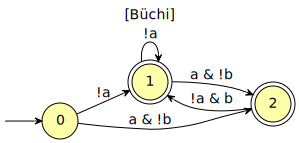

In [107]:
# Remove "alive" atomic propositions and print result.
f = spot.from_ltlf("G!(a&b) & G(a -> X b) & G(a -> X b)")
display(f)
aut = f.translate('small', 'buchi', 'sbacc')
spot.to_finite(aut)

C => B => A

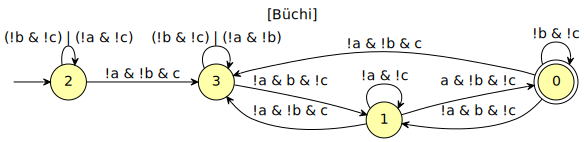

In [86]:
# Remove "alive" atomic propositions and print result.
f = spot.from_ltlf("G!(c&b&a | c&b | c&a | a&b) & (F c) & G( (c) -> (F b) ) & G( (b) -> (F a) )")
aut = f.translate('small', 'buchi', 'sbacc')
spot.to_finite(aut)

spot.formula("G!((a & b & c) | (a & b) | (a & c) | (b & c)) & Fb & ((Fb -> Fa) -> Fc)")

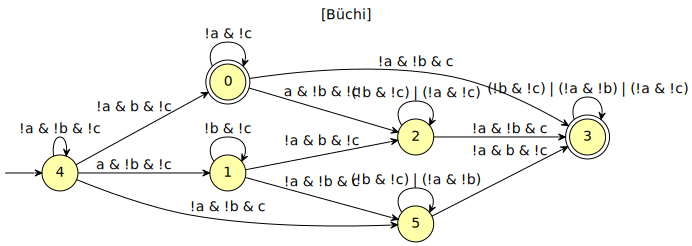

In [73]:
f = spot.formula("G!(a&b&c | a&b | a&c | b&c) & F(b) & (( (F b) -> (F(a)) ) -> (F c))")
display(f)
a = spot.translate(f)
a

In [76]:
a = spot.translate(f, 'inherently_weak')
a

ValueError: unknown option 'inherently_weak'

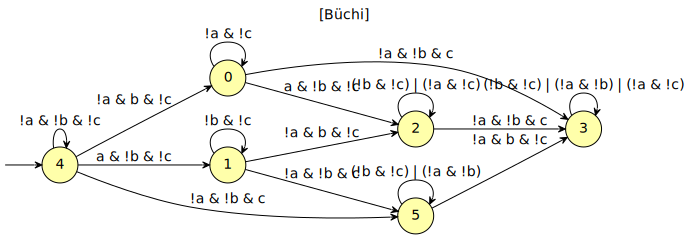

In [75]:
aut = f.translate('small', 'buchi', 'sbacc')
spot.to_finite(aut)

In [55]:
spot.

<module 'spot' from '/opt/conda/envs/uni/lib/python3.8/site-packages/spot/__init__.py'>

In [31]:
# Remove "alive" atomic propositions and print result.
print(spot.to_finite(aut).to_str('hoa'))

HOA: v1
States: 4
Start: 0
AP: 2 "a" "b"
acc-name: Buchi
Acceptance: 1 Inf(0)
properties: trans-labels explicit-labels state-acc complete
properties: deterministic
--BODY--
State: 0
[!0&1] 1
[!0&!1] 2
[0] 3
State: 1
[!0] 1
[0] 3
State: 2 {0}
[!0&1] 1
[!0&!1] 2
[0] 3
State: 3 {0}
[t] 3
--END--


In [29]:
bdict = a.get_dict()
init = a.get_init_state_number()
ui = a.is_univ_dest(init)
print("Initial states: {}{}{}".format("{ " if ui else "",
                                      " ".join(map(str, a.univ_dests(init))),
                                      " }" if ui else ""))
for s in range(0, a.num_states()):
    print("State {}:".format(s))
    for t in a.out(s):
        ud = a.is_univ_dest(t)
        print("  edge({} -> {}{}{})".format(t.src,
                                            "{ " if ud else "",
                                            " ".join(map(str, a.univ_dests(t))),
                                            " }" if ud else ""))
        print("    label =", spot.bdd_format_formula(bdict, t.cond))
        print("    acc sets =", t.acc)

Initial states: 2
State 0:
  edge(0 -> 0)
    label = !a
    acc sets = {}
  edge(0 -> 1)
    label = a
    acc sets = {}
State 1:
  edge(1 -> 1)
    label = 1
    acc sets = {0}
State 2:
  edge(2 -> 0)
    label = !a & b
    acc sets = {0}
  edge(2 -> 1)
    label = a
    acc sets = {0}
  edge(2 -> 2)
    label = !a & !b
    acc sets = {0}


In [25]:
a.get_dict()

<spot.impl.bdd_dict; proxy of <Swig Object of type 'std::shared_ptr< spot::bdd_dict > *' at 0x7ff1d71eb300> >

In [ ]:
a = spot.translate(f, 'Buchi', 'state-based', 'complete')

In [13]:
spec = Spec_Controller(["(F b) -> (F a)"], save_to="runs/")

In [14]:
for i, state in enumerate(spec.specs[0].ldba.delta):
    print(f"State {i}:")
    for k in state:
        acceptance = "ACC" if spec.specs[0].ldba.acc[i][k] == [True] else ""
        
        print(f"\t{k} -> {state[k]} {acceptance}", )

State 0:
	() -> 2 
	('a',) -> 1 ACC
	('b',) -> 3 
	('a', 'b') -> 1 ACC
State 1:
	() -> 1 ACC
	('a',) -> 1 ACC
	('b',) -> 1 ACC
	('a', 'b') -> 1 ACC
State 2:
	() -> 2 ACC
	('a',) -> 2 ACC
	('b',) -> 3 
	('a', 'b') -> 3 
State 3:
	() -> 3 
	('a',) -> 3 
	('b',) -> 3 
	('a', 'b') -> 3 


In [10]:
spec.specs[0].ldba.acc

[{(): [None], ('b',): [True]},
 {(): [True], ('b',): [True]},
 {(): [None], ('b',): [None]}]

In [5]:
spec.specs[0].ldba.reset()

(0, False)

In [6]:
spec.specs[0].ldba.step(('r2',))

(1, False)